# Homework 1

**The following notebook is meant to help you work through Problems 1, 2, and 3 on Homework 1. You are by no means required to use it, nor are you required to fill out/use any of the boilerplate code/functions. You are welcome to implement the functions however you wish.**

In [91]:
# loading data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cmath import exp
train_data = np.genfromtxt("data/earth_temperature_sampled_train.csv", delimiter = ',')
year_train = train_data[:, 0] / 1000
temp_train = train_data[:, 1]
test_data = np.genfromtxt("data/earth_temperature_sampled_test.csv", delimiter = ',')
year_test = test_data[:, 0] / 1000
temp_test = test_data[:, 1]

from T1_P1_TestCases import test_p1
from T1_P2_TestCases import test_p2

# Problem 1

## Problem 1 Subpart 1

In [78]:
def kernel_regressor(x_new, tau, x_train, y_train):
    """
    Run f_tau(x) with parameter tau on every entry of x_array.

    :param x_array: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param float tau: lengthscale parameter
    :param x_train: the x coordinates of the training set
    :param y_train: the y coordinates of the training set
    :return: if x_array = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is calculated wrt to the training data and tau
    """
    #define our tau function
    def kernel_func(x):
        return np.sum(np.exp((-(x-x_train)**2)/tau)*y_train)/np.sum(np.exp((-(x-x_train)**2)/tau))
    
    #apply it to the x_new array - this unfortunately requires a for loop
    return_x_new = np.zeros(len(x_new))
    
    for i,j in zip(x_new, range(0,len(x_new))):
        return_x_new[j] = kernel_func(i)
    
    #return our kernel predictions
    return return_x_new

In [79]:
##do not delete
test_p1(kernel_regressor)

Passed


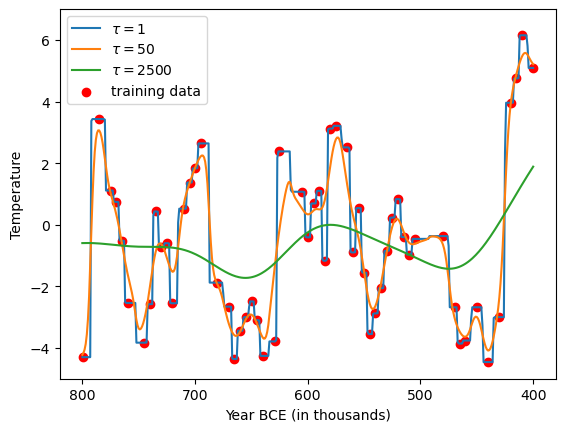

In [80]:
# plot functions
x_array = np.arange(400, 800 + 1, 1)
for tau in [1, 50, 2500]:
    plt.plot(x_array, kernel_regressor(x_array, tau, year_train, temp_train), label = f"$\\tau = {tau}$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.legend()
plt.xticks(np.arange(400, 800 + 100, 100))
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")
plt.ylim([-5,7])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p1.2.png
plt.savefig("images/p1.2.png", bbox_inches = "tight")
plt.show()

**Answers to Problem 1 Subpart 1**
When $\tau = 1$, we see that the model tracks the training data exactly, resulting in extreme overfitting. When $\tau = 50$, we see less overfitting, as the line does not always go through the training data. Finally, when $\tau = 2500$, we can see that the model underfits - it is unclear if the model sufficiently describes the trend of the data. If I had to choose a model to predict a temperature at some year in this range, I would choose the $\tau = 50$ model. Importantly, we are asked to predict the temperature for a year **within this range**, as years before/after this range might follow a different distribution. Furthermore, we can see large jumps in the temperature over the course of 1000 years. 

**Answers to Problem 1 Subpart 2**

If we were to evaluate the training MSE only, we almost definitely overfit on our training data. As 

## Problem 1 Subpart 4

In [81]:
def model_mse(predictions, true):
    """
    Calculate the MSE for the given model predictions, with respect to the true values

    :param predictions: predictions given by the model
    :param true: corresponding true values
    :return: the mean squared error
    """
    return np.mean((predictions - true)**2)
    

In [82]:
for tau in [1, 50, 2500]:
    print(f"tau = {tau}: loss = {model_mse(kernel_regressor(year_test, tau, year_train, temp_train), temp_test)}")

tau = 1: loss = 1.9472621565209178
tau = 50: loss = 1.858289916961345
tau = 2500: loss = 8.333886806980791


# Problem 2

## Problem 2 Subpart 1

In [106]:
test_a = np.array([4,1,2,3]).reshape(-1,1)
test_b = np.array([1,2,3,4]).reshape(-1,1)

In [109]:
np.concatenate((test_a, test_b), axis=1)

array([[4, 1],
       [1, 2],
       [2, 3],
       [3, 4]])

In [110]:
test_df = pd.DataFrame(np.concatenate((test_a, test_b), axis=1), columns=("a","b"))

In [119]:
test_df['c'] = test_df.a + test_df.b
test_df

,a,b,c
0,4,1,5
1,1,2,3
2,2,3,5
3,3,4,7


In [137]:
test_df.sort_values('a')

,a,b,c
1,1,2,3
2,2,3,5
3,3,4,7
0,4,1,5


In [163]:
test_df.sort_values('a').a.iloc[]

2

In [151]:
a = 1
b = 3
while a != b: 
    print(a)
    a = a + 1
    if a > 1: break

1


In [169]:
def predict_knn(x_new, k, x_train, y_train):
    """
    Returns predictions for the values in x_test, using KNN predictor with the specified k.

    :param x_new: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param k: number of nearest neighbors to consider
    :param x_train: x coordinates of training dataset
    :param y_train: y coordinates of training dataset

    :return: if x_array = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is the kNN with specified parameters and training set
    """
    
    #what if points are tied for the nearest (ie, there are two points that are 1 apart -> we should be taking the average of them)
    #if the points are tied for the 
    #how would i write this function in ocaml? ie, find the elements of a list that are closest to a list - it's kind of like max?
    
    #here is our np array of dimension (len x) x 2, based on the x_train and y_train values
    training_values = np.concatenate((x_train.reshape(-1,1), y_train.reshape(-1,1)), axis=1)
    
    #initialize our np.array for our predictions
    knn_preds_array = np.zeros(len(x_new))
    
    #calculating k nearest neighbors for every value in x_new
    for i,j in zip(x_new, range(0,len(x_new))):
        #create our local copy of k 
        local_k = k
        
        #make our dataframe
        working_df = pd.DataFrame(training_values, columns=("x_train", "y_train"))
        
        #calculate distance from the i value in x_new
        working_df['distances'] = np.abs(i - x_train)
        
        #sort the dataframe on those values, from lowest to highest
        sorted_working_df = working_df.sort_values('distances', ascending=True)
        
        #now take the first k values - note that in the case of ties, we should increase the value of our local k
        while sorted_working_df.distances.iloc[local_k-1] == sorted_working_df.distances.iloc[local_k]:
            local_k = local_k + 1
            
            #if there are too many datapoints with equivalent distances, we should stop a ridiculously long loop
            if local_k > k + 20: break
            
        #now take in the first local_k y_train values from the dataframe and return their average to the prediction array
        knn_preds_array[j] = np.mean(sorted_working_df.y_train[:local_k])
    return knn_preds_array

In [170]:
test_p2(predict_knn)

Passed


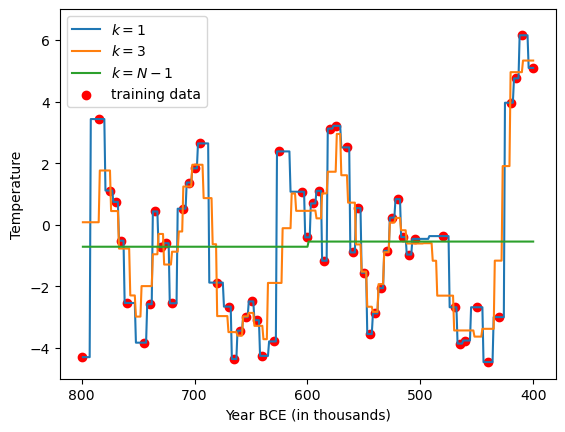

In [171]:
# plot functions
N = year_train.shape[0]
x_array = np.arange(400, 800, 1)
plt.plot(x_array, predict_knn(x_array, 1, year_train, temp_train), label = "$k = 1$")
plt.plot(x_array, predict_knn(x_array, 3, year_train, temp_train), label = "$k = 3$")
plt.plot(x_array, predict_knn(x_array, N - 1, year_train, temp_train), label = "$k = N - 1$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")

plt.legend()
plt.xticks(np.arange(400, 900, 100))
plt.ylim([-5,7])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p2.1.png
plt.savefig("images/p2.1.png", bbox_inches = "tight")
plt.show()

## Problem 2 Subpart 4

In [172]:
# choose your value of k and calculate the loss
for k in [1, 3, 55]:
    print(model_mse(predict_knn(year_test, k, year_train, temp_train), temp_test))

1.7406000000000004
3.890766222222222
9.66397324033058


# Problem 3

## Problem 3 Subpart 1

In [175]:
test_x = np.array([1,2,3,4])
2 ** test_x

array([ 2,  4,  8, 16])

In [181]:
test_x ** 1

array([1, 2, 3, 4])

In [173]:
## don't change anything here
def f_scale(X, part = "a"):
  if part == "a":
    X = X/181 # 181000
  elif part == "b":
    X = X/4e2 # 4e5
  elif part == "c":
    X = X/1.81 # 1810    
  elif part == "d":
    X = X/.181 # 181
  return X
###

In [240]:
# TODO: Complete this `make_basis` function according to the above
# specifications. The function should return the array `phi(X)`
def make_basis(X,part='a'):
  """
  Args:
    X: input of years (or any variable you want to turn into the appropriate basis) as
      ndarray with length `N`.
    part: one of `a`, `b`, `c`, `d` depending on the basis function.

  Returns:
    ndarray `phi(X)` of shape `(N,D)`. For each part the shapes of your
    training data `make_basis(years_train)` should be
      (a) 57x10, (b) 57x10, (c) 57x10, (d) 57x50.
  """
  
  phi_X = []
  ### DO NOT CHANGE THIS SECTION 
  ### it is to prevent numerical instability from taking the exponents of
  ### the years, as well as break symmetry when dealing with a Fourier basis.
  X = f_scale(X, part)
  ### end section
  
  if part == 'a':
    #create our phi_X, which should be an array of shape (N, D) = (N, 10)
    phi_X = np.ones((len(X), 10))
    
    #the first column is our bias (given by np.ones)
    
    #phi_X for every other thing
    for j in range(1,10):
        phi_X[:,j] = X**j
  elif part=='b':
    #create our phi_X, which should be an array of shape (N, D) = (N, 10)
    phi_X = np.ones((len(X), 10))
    
    #the first column is our bias (given by np.ones)
    for j in range(1,10):
        mu_j = (j + 7)/8
        phi_X[:,j] = np.exp(-(X-mu_j)**2/5)
  elif part=='c':
    #create our phi_X, which should be an array of shape (N, D) = (N, 10)
    phi_X = np.ones((len(X), 10))
    
    #the first column is our bias (given by np.ones)
    for j in range(1,10):
        phi_X[:,j] = np.cos(X/j)
  elif part=='d':
    #create our phi_X, which should be an array of shape (N, D) = (N, 50)
    phi_X = np.ones((len(X), 50))
    
    #first column is bias
    
    for j in range(1,50):
        phi_X[:,j] = np.cos(X/j)
  return phi_X

In [211]:
test_array = np.ones((3,2))
test_array[:, 1] = np.array([1,2,3]) ** 2
test_array

array([[1., 1.],
       [1., 4.],
       [1., 9.]])

We are now solving the multi-dimensional OLS regression problem. For each $i=1,\ldots, N$, we have 
$$ \hat y_i = \mathbf{w}^\top\mathbf{\phi}(x_i) = \sum_{j=1}^D w_j \phi_j(x_i).  $$

We can find the weights that minimize the MSE $\frac 1N\| \mathbf{y} - \mathbf{\phi}(\mathbf{X})\mathbf{w}\| $ with the analytic solution described in the textbook at Derivation 2.6.1.
$$ \mathbf{w^*} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}. $$

In [217]:
# Find the regression weights using the Moore-Penrose pseudoinverse.
def find_weights(X,y):
    w_star = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return w_star

In [223]:
ab = [1,2,3,4]
test_list = [0 for _ in ab]

In [241]:
xs = np.linspace(year_train.min(), year_train.max(), 1000)

In [242]:
make_basis(xs, 'a')

array([[1.00000000e+00, 2.20964641e+00, 4.88253725e+00, ...,
        2.57193198e+02, 5.68306027e+02, 1.25575537e+03],
       [1.00000000e+00, 2.21185610e+00, 4.89230743e+00, ...,
        2.58999001e+02, 5.72868522e+02, 1.26710274e+03],
       [1.00000000e+00, 2.21406580e+00, 4.90208737e+00, ...,
        2.60815661e+02, 5.77463036e+02, 1.27854116e+03],
       ...,
       [1.00000000e+00, 4.41271320e+00, 1.94720378e+01, ...,
        3.25791625e+04, 1.43762501e+05, 6.34382685e+05],
       [1.00000000e+00, 4.41492290e+00, 1.94915442e+01, ...,
        3.26935339e+04, 1.44339431e+05, 6.37247461e+05],
       [1.00000000e+00, 4.41713260e+00, 1.95110604e+01, ...,
        3.28082492e+04, 1.44918387e+05, 6.40123731e+05]])

In [245]:
basis_xs.shape

(1000, 10)

In [246]:
weights.shape

(10,)

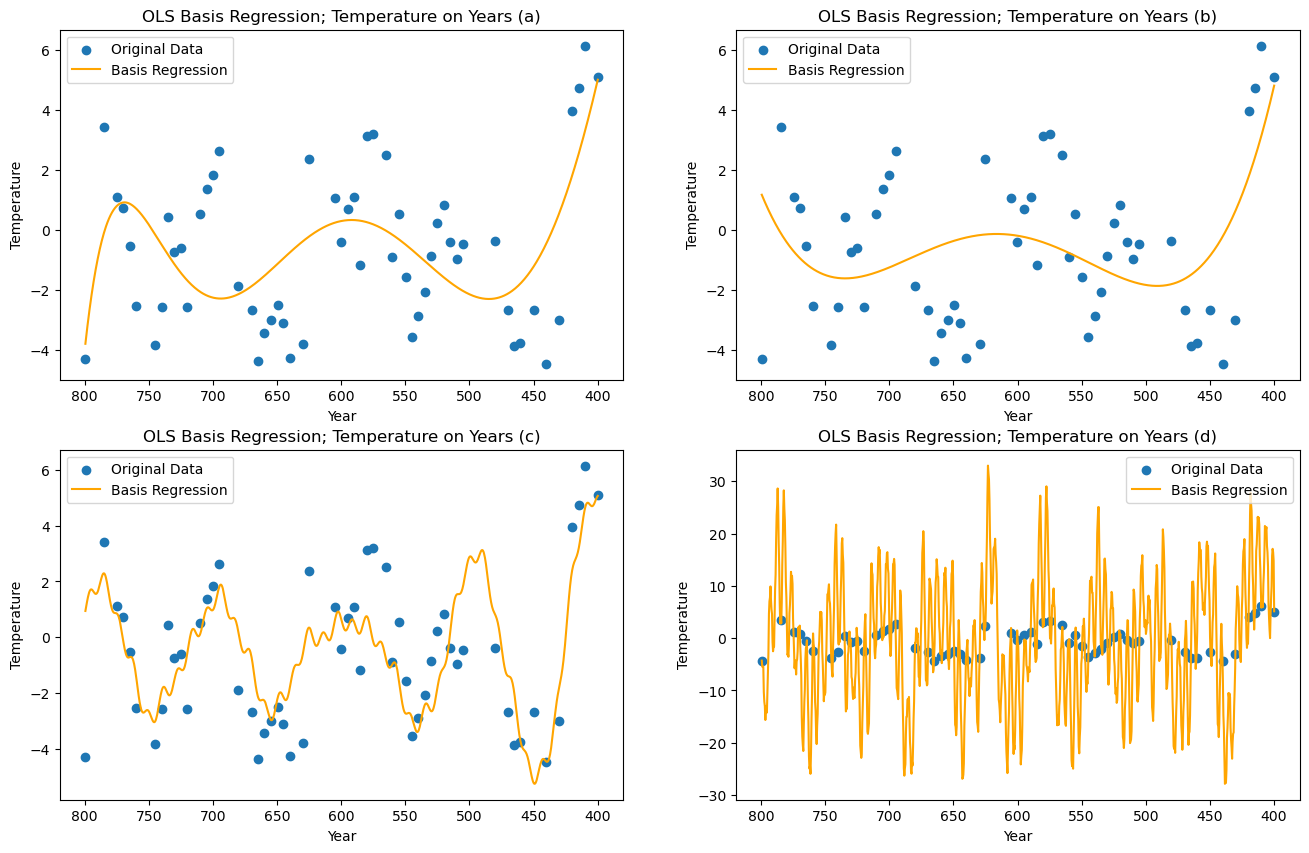

In [247]:
_, ax = plt.subplots(2,2, figsize = (16,10))

for i, part in enumerate(['a', 'b', 'c' ,'d']):
  # Plotting the original data
  
  ax[i//2, i%2].scatter(year_train, temp_train, label = "Original Data")
  ax[i//2, i%2].set_xlabel("Year")
  ax[i//2, i%2].set_ylabel("Temperature")
  ax[i//2, i%2].set_title(f"OLS Basis Regression; Temperature on Years ({part})")
  ax[i//2, i%2].invert_xaxis()

  xs = np.linspace(year_train.min(), year_train.max(), 1000)
    
  # TODO: plot your functions for the specified xs
  # we need to first use our basis function to convert the xs to phi_X
  # SUBJECT TO REVISIONS
  y_pred = [0 for _ in xs] #this gives us a list of 0's the length of xs
  
  #we need to first get our xs into a basis
  basis_xs = make_basis(xs, part)
  
  #we need to get our weights
  weights = find_weights(make_basis(year_train, part), temp_train)
    
  #now take the dot product of our weights and basis_xs to get our predictions
  y_pred = np.dot(basis_xs, weights.T)

  ax[i//2, i%2].plot(xs, y_pred, color = 'orange', label = "Basis Regression")


  ax[i//2, i%2].legend()

plt.savefig("images/p3.1.png")
  


## Problem 3 Subpart 2

In [248]:
def mean_squared_error(X,y, w):
  # TODO: Given a linear regression model with parameter w, compute and return the
  # mean squared error
  predictions = np.dot(X, w)
  return np.mean((y - predictions)**2)
  #so we simply need a linear regression model defined by the parameter w (weights) and the inputs X

def negative_log_likelihood(X,y,w, sigma):
  # TODO: Given a probabilistic linear regression model y = w^T x + e, where
  # e is N(0, sigma), return the negative log likelihood of the data X,y.
  pass


In [ ]:
mean_squared_error(make_basis(

In [ ]:
for part in ['a', 'b', 'c', 'd']:
  # TODO: compute the MSE and Likelihood and print the results

  train_mse = 181
  test_mse = 181
  
  print(f"\nPart ({part});\n\n Train MSE: {train_mse:.2f}; Test MSE: {test_mse:.2f}\n")
  
  # TODO: compute the likelihood. 
  train_log_nll = 181
  test_log_nll = 181
  print(f" Train Negative Log-Likelihood: {train_log_nll:.3f}; Test Negative Log-Likelihood: {test_log_nll:.3f}")